In [66]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
loan_dataset=pd.read_csv(url)

In [3]:
loan_dataset.shape

(614, 13)

In [4]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
loan_dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0],inplace=True)
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0],inplace=True)
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0],inplace=True)
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0],inplace=True)
loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean(),inplace=True)
loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mode()[0],inplace=True)
loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mode()[0],inplace=True)

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_dataset.drop(columns=['Loan_ID'],inplace=True)

In [11]:
x=pd.DataFrame(loan_dataset.dtypes)
y=pd.DataFrame(loan_dataset.nunique())
frames=[x,y]
z=pd.concat(frames,axis=1)
z.columns=['type','unique']
z

,type,unique
Gender,object,2
Married,object,2
Dependents,object,4
Education,object,2
Self_Employed,object,2
ApplicantIncome,int64,505
CoapplicantIncome,float64,287
LoanAmount,float64,204
Loan_Amount_Term,float64,10
Credit_History,float64,2


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

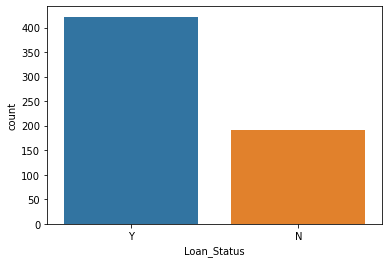

In [12]:
sns.countplot('Loan_Status',data=loan_dataset)

In [13]:
loan_dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

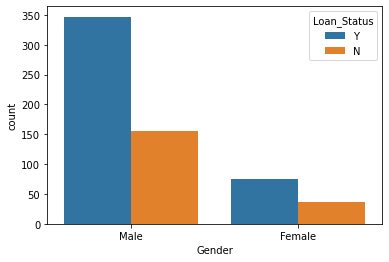

In [14]:
sns.countplot('Gender',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

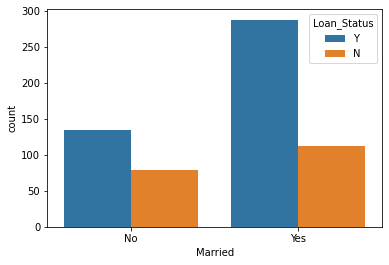

In [15]:
sns.countplot('Married',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

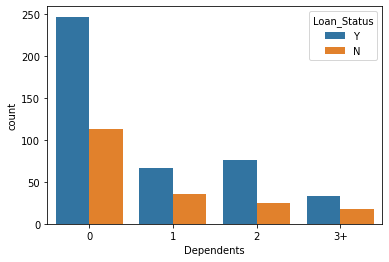

In [16]:
sns.countplot('Dependents',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Education', ylabel='count'>

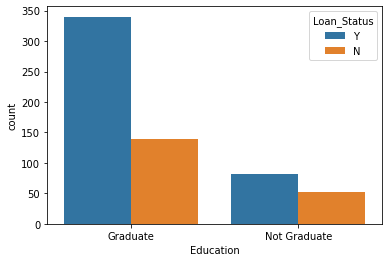

In [17]:
sns.countplot('Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

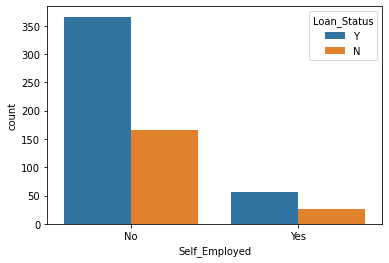

In [18]:
sns.countplot('Self_Employed',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

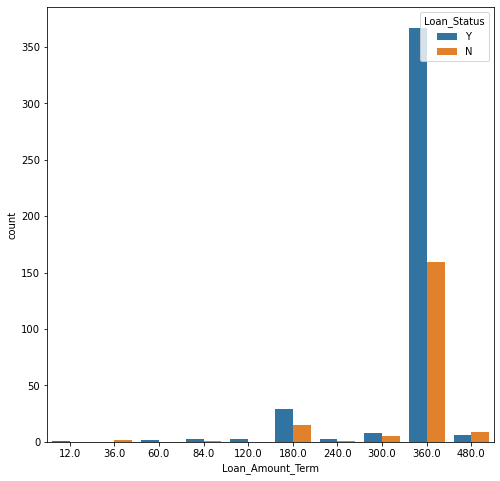

In [19]:
plt.figure(figsize = (8,8))
sns.countplot('Loan_Amount_Term',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

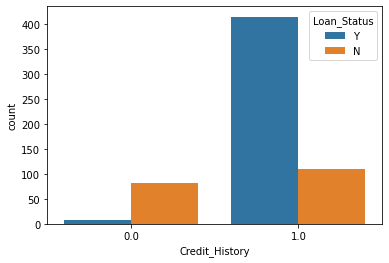

In [20]:
sns.countplot('Credit_History',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

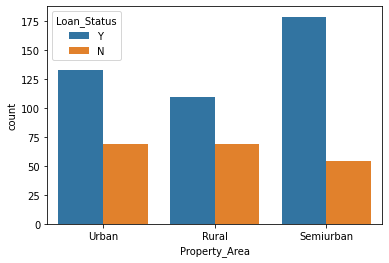

In [21]:
sns.countplot('Property_Area',hue='Loan_Status',data=loan_dataset)

Observation:
1. Dataset is imbalance and size of dataset is small
2. Dataset contains null values (nullifed them)
3. Gender and LoanID doesn't play any role in outcome of loan status, though majority of the people who have applied for loan are male.
4. Higher the Loan amount term more is probability of get a loan
5. People with zero credit history have a better chance of getting loan 
6. Urban and Rural property area have good chance of getting a loan
7. Self employed and graduates seems to have no effect on the loan status.

In [22]:
le=LabelEncoder()
for i in loan_dataset:
    if loan_dataset[i].dtype=='object':
         loan_dataset[i]=le.fit_transform(loan_dataset[i])

In [23]:
loan_dataset.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

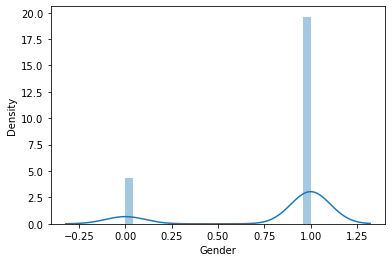

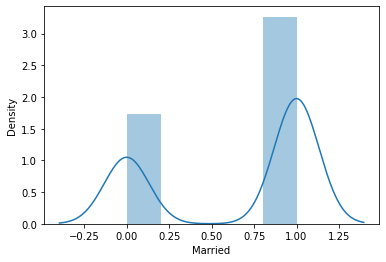

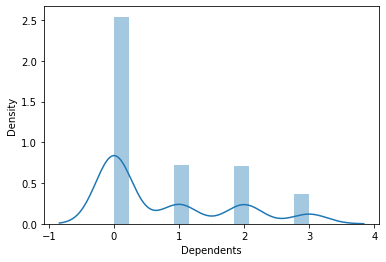

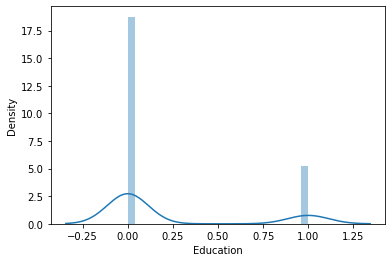

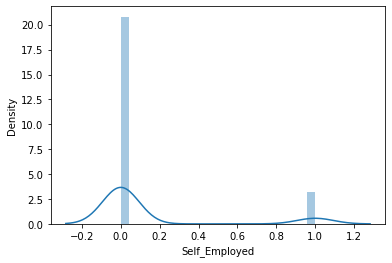

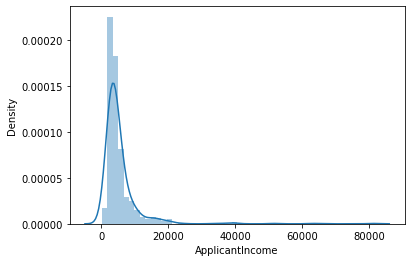

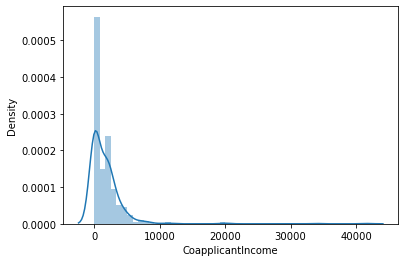

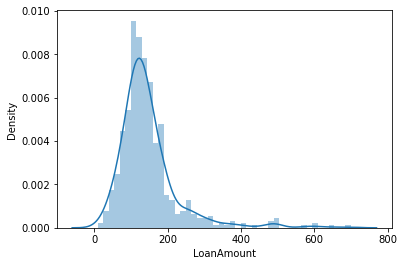

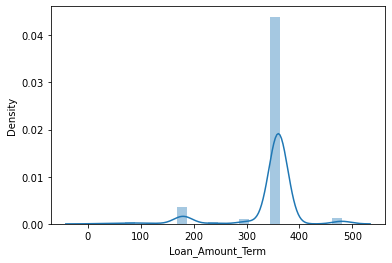

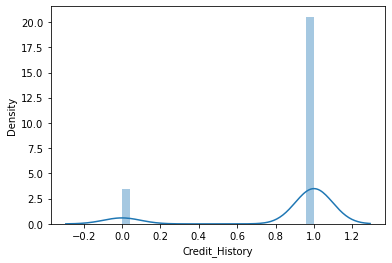

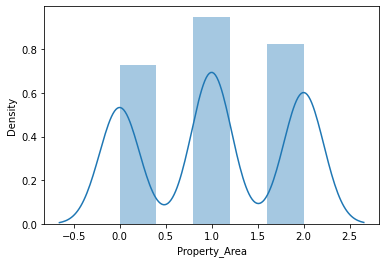

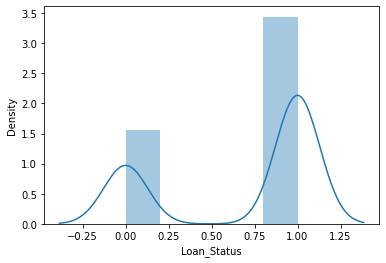

In [24]:
for j in loan_dataset:
    sns.distplot(loan_dataset[j])
    plt.show()

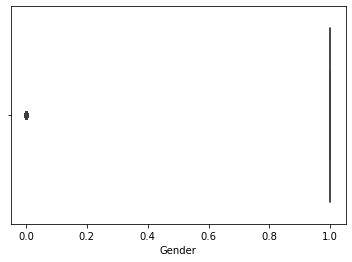

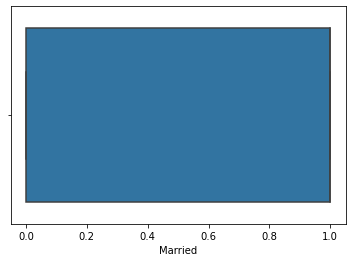

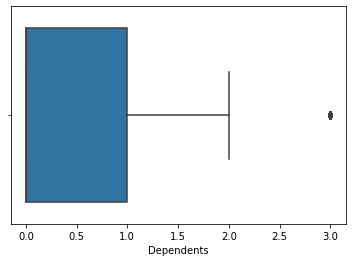

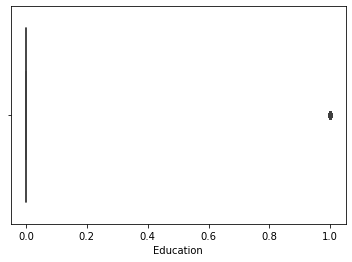

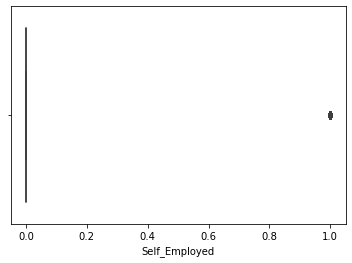

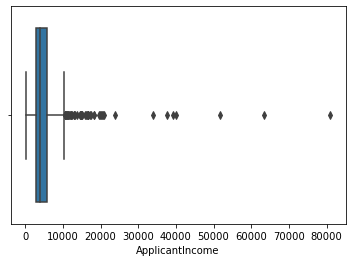

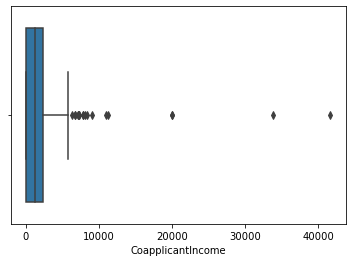

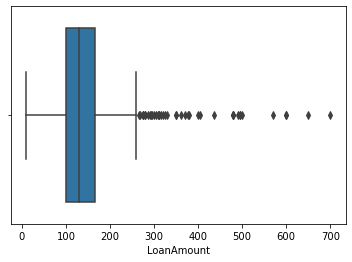

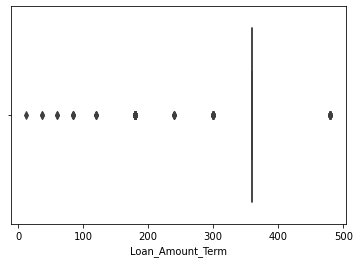

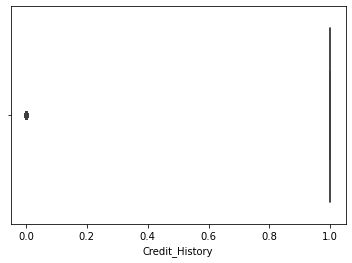

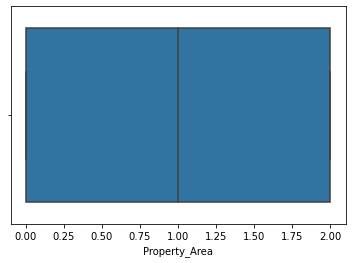

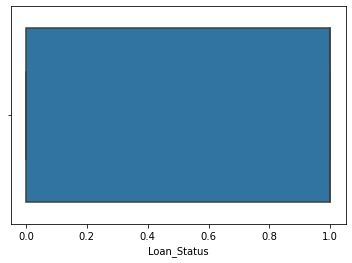

In [25]:
for k in loan_dataset:
    sns.boxplot(loan_dataset[k])
    plt.show()

In [26]:
#arresting the outliers using IQR method
def out(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[col] < Q1 - whisker_width*IQR) | (df[col] > Q3 + whisker_width*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [27]:
out(loan_dataset,'ApplicantIncome')
out(loan_dataset,'CoapplicantIncome')
out(loan_dataset,'LoanAmount')

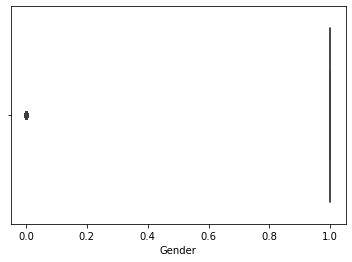

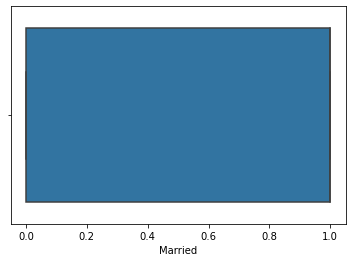

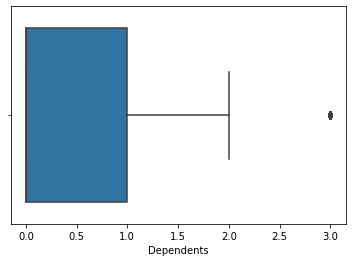

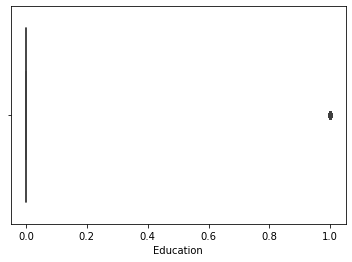

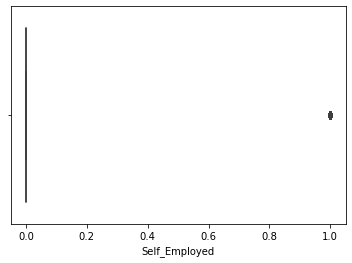

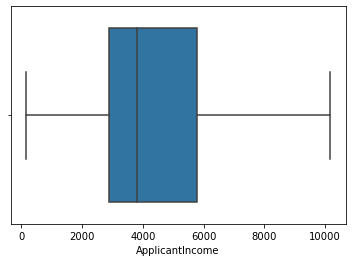

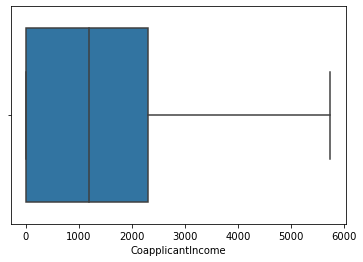

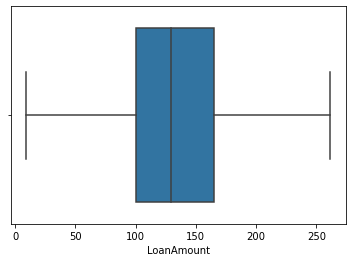

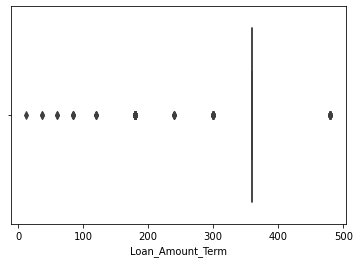

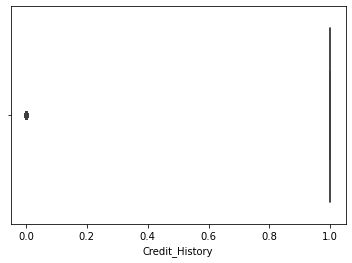

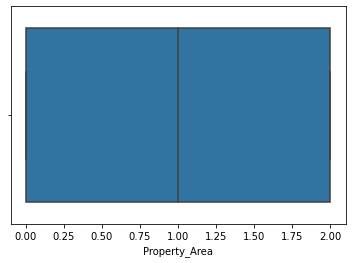

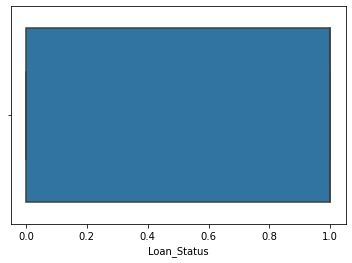

In [28]:
for k in loan_dataset:
    sns.boxplot(loan_dataset[k])
    plt.show()

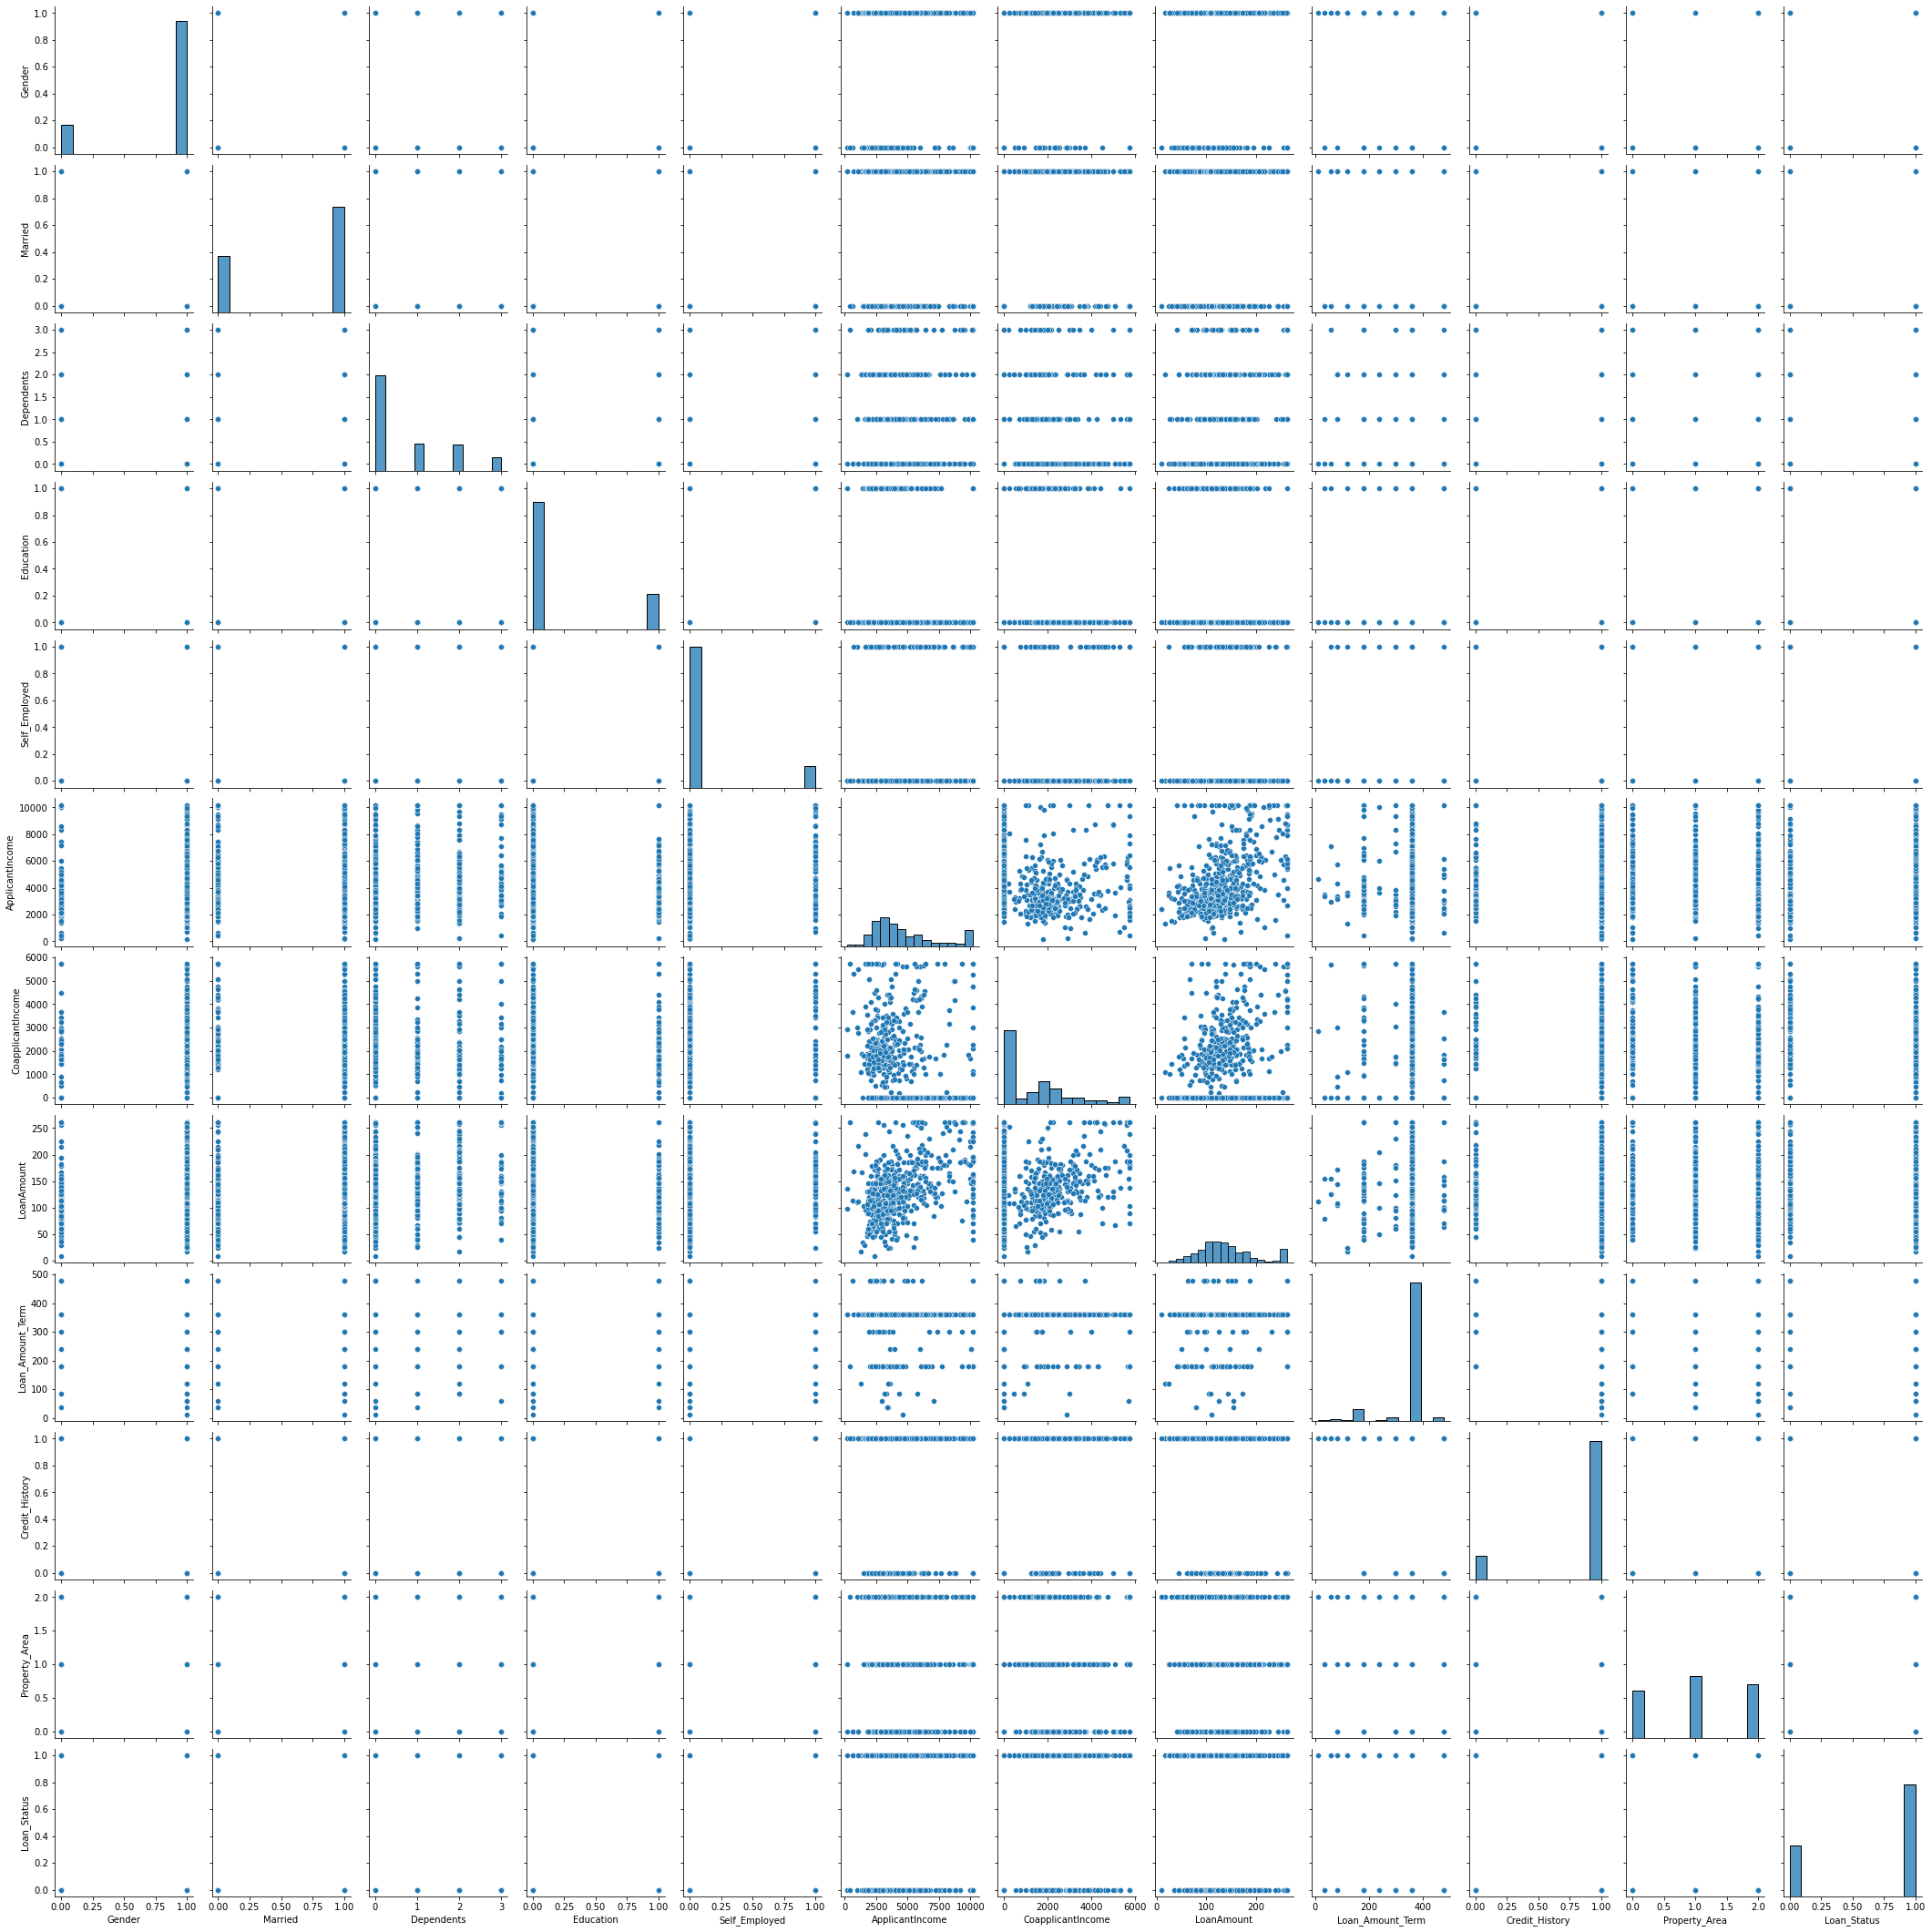

In [29]:
sns.pairplot(loan_dataset)

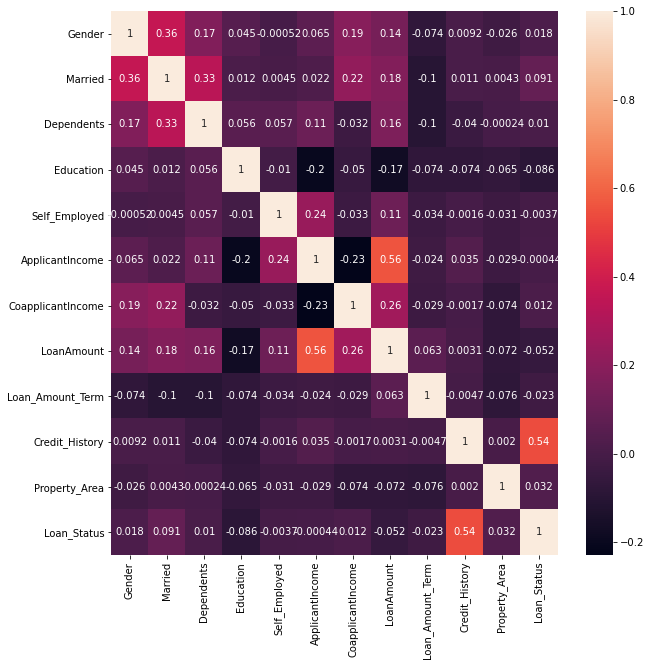

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(loan_dataset.corr(), annot=True)
plt.show()

In [31]:
loan_dataset.drop(columns=['Gender','Married','ApplicantIncome','Dependents','LoanAmount'],inplace=True)

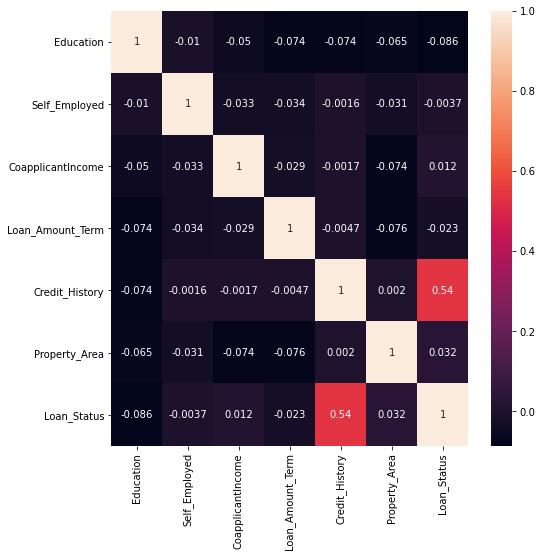

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(loan_dataset.corr(), annot=True)
plt.show()

In [33]:
loan_dataset.skew()

Education            1.367622
Self_Employed        2.159796
CoapplicantIncome    1.012763
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [34]:
X=loan_dataset.drop(columns=['Loan_Status'])
Y=loan_dataset['Loan_Status']

In [35]:
scalar= StandardScaler()
X_scaled= scalar.fit_transform(X)

In [36]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
  
vif_data

,feature,VIF
0,Education,1.020024
1,Self_Employed,1.003923
2,CoapplicantIncome,1.011679
3,Loan_Amount_Term,1.015438
4,Credit_History,1.005620
5,Property_Area,1.019088


In [37]:
oversample= SMOTE()
X_over,Y_over=oversample.fit_resample(X_scaled,Y)

In [38]:
X_train, X_test, Y_train, Y_test= train_test_split(X_over,Y_over,test_size=0.2,stratify=Y_over)

In [39]:
Counter(Y_train)

Counter({0: 338, 1: 337})

In [40]:
X_train.shape

(675, 6)

In [41]:
xgb= XGBClassifier()
param={
    'n_estimators':[150,200,300,400,500],
    'learning_rate':[0.01,0.03,0.1,0.2],
    'subsample':[0.3,0.4,0.6],
    'max_depth':[3,5,7,9,10],
    'colsample_bytree':[0.1,0.2,0.3,0.4],
    'min_child_weight':[1,2,3,4,5],
}
xgb_C=gs(xgb,param_grid=param,cv=5,refit=True,n_jobs=5)
xgb_C.fit(X_train,Y_train)

[20:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

In [42]:
xgb_C.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.3, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [43]:
model1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=2,monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.4, tree_method='exact', validate_parameters=1,
              verbosity=None)
model1.fit(X_train,Y_train)
p1=model1.predict(X_test)
print(classification_report(p1,Y_test))

[20:36:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        71
           1       0.85      0.73      0.79        98

    accuracy                           0.77       169
   macro avg       0.77      0.78      0.77       169
weighted avg       0.78      0.77      0.77       169



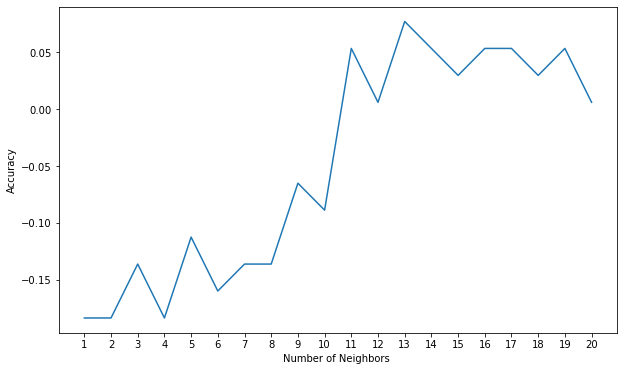

In [44]:
knc = KNeighborsClassifier()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knc = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat2= knc.predict(X_test)
    mean_acc[i-1] = metrics.r2_score(Y_test, yhat2)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [45]:
knn=KNeighborsClassifier()
para={
        'n_neighbors':[11,12,13,14],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50,60],
        'p':[2,3],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=5, n_jobs=5)
knn_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50, 60], 'metric': ['minkowski'],
                         'n_neighbors': [11, 12, 13, 14], 'p': [2, 3],
                         'weights': ['uniform', 'distance']})

In [46]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=12)

In [47]:
model2=KNeighborsClassifier(n_neighbors=12)
model2.fit(X_train,Y_train)
p2=model2.predict(X_test)
print(classification_report(p2,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        84
           1       0.75      0.75      0.75        85

    accuracy                           0.75       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.75      0.75      0.75       169



In [63]:
logr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = gs(estimator=logr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [74]:
model3=LogisticRegression(C=0.01, solver='newton-cg')
model3.fit(X_train,Y_train)
p3=model3.predict(X_test)
print(classification_report(p3, Y_test))

              precision    recall  f1-score   support

           0       0.43      0.97      0.60        37
           1       0.99      0.64      0.77       132

    accuracy                           0.71       169
   macro avg       0.71      0.80      0.68       169
weighted avg       0.87      0.71      0.73       169



In [68]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=1000)}
gs_NB = gs(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train,Y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.79469667e-01, 9.59360829e-01, 9.39664831e-01,
       9.20373200e-01, 9.01477631e-01, 8.82969996e-01, 8.64842328e-01,
       8.47086827e-01, 8.29695852e-01, 8.12661920e-01, 7.95977700e-01,
       7.79636013e-01, 7.63629826e-01, 7.47952252e-01, 7.32596543e-01,
       7.17556092e-01, 7.02824426e-01, 6.88...
       1.61141428e-09, 1.57833141e-09, 1.54592774e-09, 1.51418933e-09,
       1.48310251e-09, 1.45265393e-09, 1.42283046e-09, 1.39361927e-09,
       1.36500781e-09, 1.33698374e-09, 1.30953502e-09, 1.28264983e-09,
       1.25631660e-09, 1.23052400e-09, 1.20526094e-09, 1.18051653e-09,
       1.15628013e-09, 1.13254132e-09, 1.10928986e-09, 1.08651577e-09,
       1.06420924e-09, 1.04236067e-09, 1.02096066e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [69]:
gs_NB.best_estimator_

GaussianNB(var_smoothing=1.0)

In [75]:
model4=GaussianNB(var_smoothing=1.0)
model4.fit(X_train,Y_train)
p4=model4.predict(X_test)
print(classification_report(p4, Y_test))

              precision    recall  f1-score   support

           0       0.43      0.97      0.60        37
           1       0.99      0.64      0.77       132

    accuracy                           0.71       169
   macro avg       0.71      0.80      0.68       169
weighted avg       0.87      0.71      0.73       169



In [76]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, p1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, p2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_test, p3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test, p4)


print('roc_auc_score for XGB Classifier: ', roc_auc_score(Y_test, p1))
print('roc_auc_score for KNeighbors Classifier: ', roc_auc_score(Y_test, p2))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, p3))
print('roc_auc_score for GaussianNB: ', roc_auc_score(Y_test, p4))

roc_auc_score for XGB Classifier:  0.7687675070028012
roc_auc_score for KNeighbors Classifier:  0.7514705882352941
roc_auc_score for Logistic Regression:  0.7084033613445379
roc_auc_score for GaussianNB:  0.7084033613445379


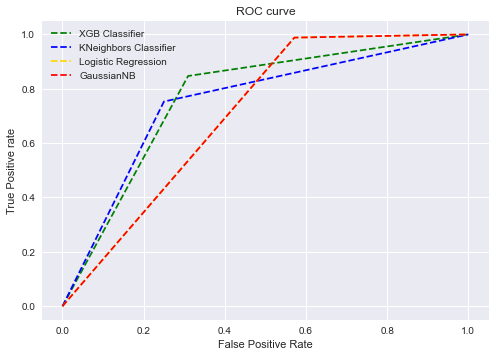

In [77]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(false_positive_rate1, true_positive_rate1, linestyle='--',color='green', label='XGB Classifier')
plt.plot(false_positive_rate2, true_positive_rate2, linestyle='--', color='blue', label='KNeighbors Classifier')
plt.plot(false_positive_rate3, true_positive_rate3, linestyle='--', color='gold', label='Logistic Regression')
plt.plot(false_positive_rate4, true_positive_rate4, linestyle='--', color='red', label='GaussianNB')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

XGB Classifier True Positive and Negative rate have good values so selecting XGB classifier as our model.

In [79]:
#saving the model
XGB_classifier_loan= pickle.dumps(model1)